In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
sns.set_palette('Set3')

import missingno as msno
import warnings
warnings.filterwarnings('ignore')

import scipy.stats

plt.rcParams["font.family"] = "NanumBarunGothic"

from category_encoders.target_encoder import TargetEncoder

In [132]:
path = "C:/Cafe_Test"

# 데이터 URL : https://www.data.go.kr/data/15083033/fileData.do
Top_Lib = pd.read_csv(path + '/Chungnam_Market_2312.csv', encoding='CP949')

num_rows, num_columns = Top_Lib.shape

# 결과 출력
print(f"데이터 수: {num_rows}")

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

데이터 수: 111528


In [133]:
# information
Top_Lib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111528 entries, 0 to 111527
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     111528 non-null  object 
 1   상호명        111528 non-null  object 
 2   지점명        1679 non-null    object 
 3   상권업종대분류코드  111528 non-null  object 
 4   상권업종대분류명   111528 non-null  object 
 5   상권업종중분류코드  111528 non-null  object 
 6   상권업종중분류명   111528 non-null  object 
 7   상권업종소분류코드  111528 non-null  object 
 8   상권업종소분류명   111528 non-null  object 
 9   표준산업분류코드   111490 non-null  object 
 10  표준산업분류명    111490 non-null  object 
 11  시도코드       111528 non-null  int64  
 12  시도명        111528 non-null  object 
 13  시군구코드      111528 non-null  int64  
 14  시군구명       111528 non-null  object 
 15  행정동코드      111528 non-null  int64  
 16  행정동명       111528 non-null  object 
 17  법정동코드      111528 non-null  int64  
 18  법정동명       111528 non-null  object 
 19  지번코드       111528 non-n

<Axes: >

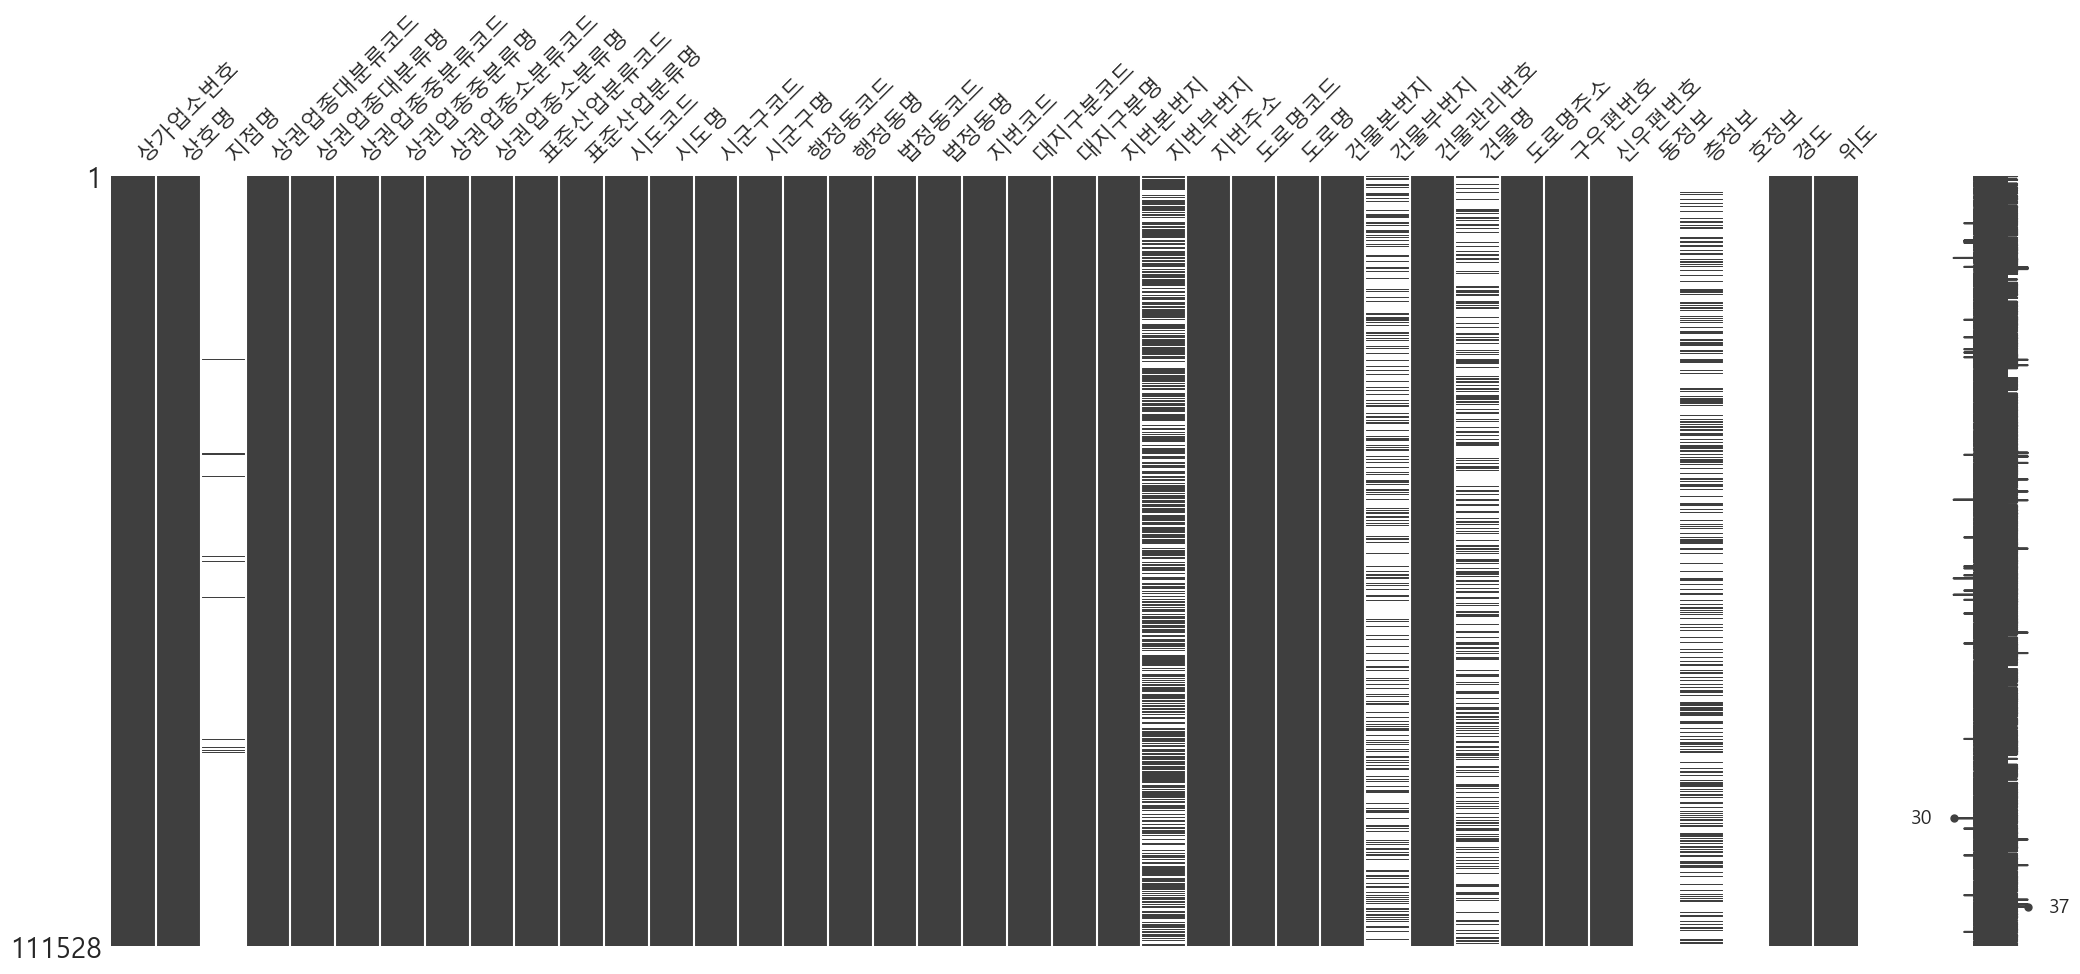

In [134]:
# 결측치 확인
msno.matrix(Top_Lib)

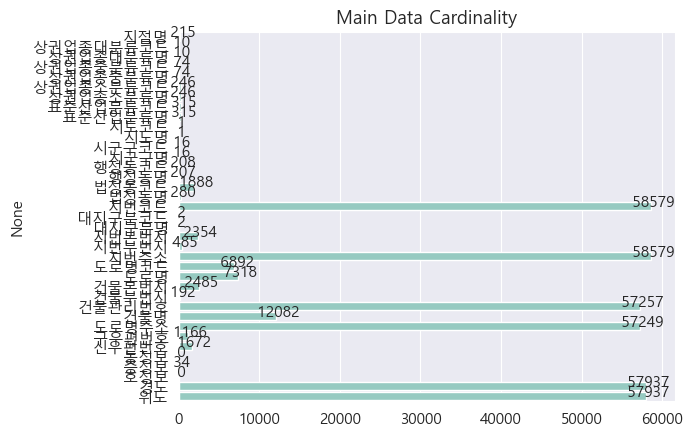

In [135]:
# 카디널리티

g = sns.barplot(
    y = Top_Lib.nunique()[2:].index ,
    x = Top_Lib.nunique()[2:].values
)

# 숫자 표시
for p in g.patches:
    g.text(
        p.get_x() + p.get_width() ,
        p.get_y() + (p.get_height() / 2) ,
        f"{p.get_width() : .0f}" ,
        ha = 'center'
    )

g.set_title('Main Data Cardinality')
plt.show()

In [136]:
### 2. 데이터 수치 살펴보기
Top_Lib.describe().style.background_gradient(cmap='pink_r')

,시도코드,시군구코드,행정동코드,법정동코드,지번코드,대지구분코드,지번본번지,지번부번지,도로명코드,건물본번지,건물부번지,구우편번호,신우편번호,동정보,호정보,경도,위도
count,111528.000000,111528.000000,111528.000000,111528.000000,111528.000000,111528.000000,111519.000000,74734.000000,111528.000000,111528.000000,29646.000000,111528.000000,111528.000000,0.000000,0.000000,111528.000000,111528.000000
mean,44.000000,44318.111972,44318537.654168,4431831664.023644,4431474890288554496.000000,1.002771,573.747397,16.222054,443184897314.721191,213.732856,13.509276,336681.289990,31984.753174,nan,nan,126.909370,36.649303
std,0.000000,257.644328,257564.820793,25769258.556313,47419416118701096.000000,0.052564,507.257009,48.217544,2576432001.217277,498.120594,20.136449,12890.282703,784.994023,nan,nan,0.294315,0.251211
min,44.000000,44131.000000,44131250.000000,4413110100.000000,442003302510000.000000,1.000000,1.000000,1.000000,441312249001.000000,1.000000,1.000000,312700.000000,31000.000000,nan,nan,126.064848,35.984224
25%,44.000000,44133.000000,44133580.000000,4413310800.000000,4413310800115369984.000000,1.000000,189.000000,2.000000,441334550330.000000,20.000000,3.000000,330730.000000,31197.000000,nan,nan,126.655367,36.466815
50%,44.000000,44200.000000,44200580.000000,4420033025.000000,4420033025106890240.000000,1.000000,424.000000,6.000000,442004559275.000000,53.000000,7.000000,331999.000000,31801.000000,nan,nan,127.021401,36.776534
75%,44.000000,44270.000000,44270510.000000,4427032021.000000,4427032021103495168.000000,1.000000,803.000000,13.000000,442704595182.000000,171.250000,16.000000,343925.000000,32569.000000,nan,nan,127.133856,36.817786
max,44.000000,44825.000000,44825360.000000,4482536025.000000,4482536025107040256.000000,2.000000,3920.000000,1576.000000,448254861378.000000,7522.000000,394.000000,357972.000000,33677.000000,nan,nan,127.622191,37.056555


In [137]:
# 결측값 퍼센트 확인
cols = ['시도코드','시군구코드','행정동코드','법정동코드','지번코드','대지구분코드','지번본번지','지번부번지','도로명코드','건물본번지','건물부번지','구우편번호','신우편번호','동정보','호정보','경도','위도']

print("----------------------충청남도 소상공 데이터 결측치 확인----------------------")
for col in cols:  
    print(f"column : {col} Nan value percentage : {round(Top_Lib[col].isna().sum() / len(Top_Lib) * 100 , 2)}%")



print("")

----------------------충청남도 소상공 데이터 결측치 확인----------------------
column : 시도코드 Nan value percentage : 0.0%
column : 시군구코드 Nan value percentage : 0.0%
column : 행정동코드 Nan value percentage : 0.0%
column : 법정동코드 Nan value percentage : 0.0%
column : 지번코드 Nan value percentage : 0.0%
column : 대지구분코드 Nan value percentage : 0.0%
column : 지번본번지 Nan value percentage : 0.01%
column : 지번부번지 Nan value percentage : 32.99%
column : 도로명코드 Nan value percentage : 0.0%
column : 건물본번지 Nan value percentage : 0.0%
column : 건물부번지 Nan value percentage : 73.42%
column : 구우편번호 Nan value percentage : 0.0%
column : 신우편번호 Nan value percentage : 0.0%
column : 동정보 Nan value percentage : 100.0%
column : 호정보 Nan value percentage : 100.0%
column : 경도 Nan value percentage : 0.0%
column : 위도 Nan value percentage : 0.0%



In [138]:
Top_Lib.info

<bound method DataFrame.info of                       상가업소번호         상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드  \
0       MA010120220805431853        오르만홈  NaN        G2       소매      G209   
1       MA010120220805432733        시골백반  NaN        I2       음식      I201   
2       MA010120220805433007  미르공인중개사사무소  NaN        L1      부동산      L102   
3       MA010120220805433136       롤링테이블  NaN        I2       음식      I201   
4       MA010120220805434855         유케야  NaN        I2       음식      I201   
...                      ...         ...  ...       ...      ...       ...   
111523  MA010120220806004401        싱싱닭집  NaN        G2       소매      G205   
111524  MA010120220803856706     아리아휘트니스  NaN        R1   예술·스포츠      R103   
111525  MA010120220809980633     연무읍힐링펜션  NaN        I1       숙박      I101   
111526  MA010120220805987832      해룡낚시천막  NaN        G2       소매      G213   
111527  MA010120220806065921      교촌치킨신부  NaN        I2       음식      I210   

           상권업종중분류명 상권업종소분류코드  

In [139]:
Cheonan_Seobuk = Top_Lib[Top_Lib['시군구명'] == '천안시 서북구']

In [140]:
# 충청남도 천안시 서북구 데이터만 추출
Cheonan_Seobuk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19055 entries, 3 to 111520
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     19055 non-null  object 
 1   상호명        19055 non-null  object 
 2   지점명        423 non-null    object 
 3   상권업종대분류코드  19055 non-null  object 
 4   상권업종대분류명   19055 non-null  object 
 5   상권업종중분류코드  19055 non-null  object 
 6   상권업종중분류명   19055 non-null  object 
 7   상권업종소분류코드  19055 non-null  object 
 8   상권업종소분류명   19055 non-null  object 
 9   표준산업분류코드   19053 non-null  object 
 10  표준산업분류명    19053 non-null  object 
 11  시도코드       19055 non-null  int64  
 12  시도명        19055 non-null  object 
 13  시군구코드      19055 non-null  int64  
 14  시군구명       19055 non-null  object 
 15  행정동코드      19055 non-null  int64  
 16  행정동명       19055 non-null  object 
 17  법정동코드      19055 non-null  int64  
 18  법정동명       19055 non-null  object 
 19  지번코드       19055 non-null  int64  
 20  대지구분코드    

In [141]:
# 충청남도 천안시 서북구 중 
Cheonan_Seobu0k_Cafe = Cheonan_Seobuk[(Cheonan_Seobuk['상권업종소분류명'] == '카페') | 
                                      (Cheonan_Seobuk['상권업종소분류명'] == '토스트/샌드위치/샐러드') | 
                                      (Cheonan_Seobuk['상권업종소분류명'] == '빵/도넛') | 
                                      (Cheonan_Seobuk['상권업종소분류명'] == '생수/음료 소매업')]


In [142]:
# 충청남도 천안시 서북구에 존재하는 카페 데이터만 추출
Cheonan_Seobu0k_Cafe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1057 entries, 43 to 111262
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     1057 non-null   object 
 1   상호명        1057 non-null   object 
 2   지점명        53 non-null     object 
 3   상권업종대분류코드  1057 non-null   object 
 4   상권업종대분류명   1057 non-null   object 
 5   상권업종중분류코드  1057 non-null   object 
 6   상권업종중분류명   1057 non-null   object 
 7   상권업종소분류코드  1057 non-null   object 
 8   상권업종소분류명   1057 non-null   object 
 9   표준산업분류코드   1057 non-null   object 
 10  표준산업분류명    1057 non-null   object 
 11  시도코드       1057 non-null   int64  
 12  시도명        1057 non-null   object 
 13  시군구코드      1057 non-null   int64  
 14  시군구명       1057 non-null   object 
 15  행정동코드      1057 non-null   int64  
 16  행정동명       1057 non-null   object 
 17  법정동코드      1057 non-null   int64  
 18  법정동명       1057 non-null   object 
 19  지번코드       1057 non-null   int64  
 20  대지구분코드    

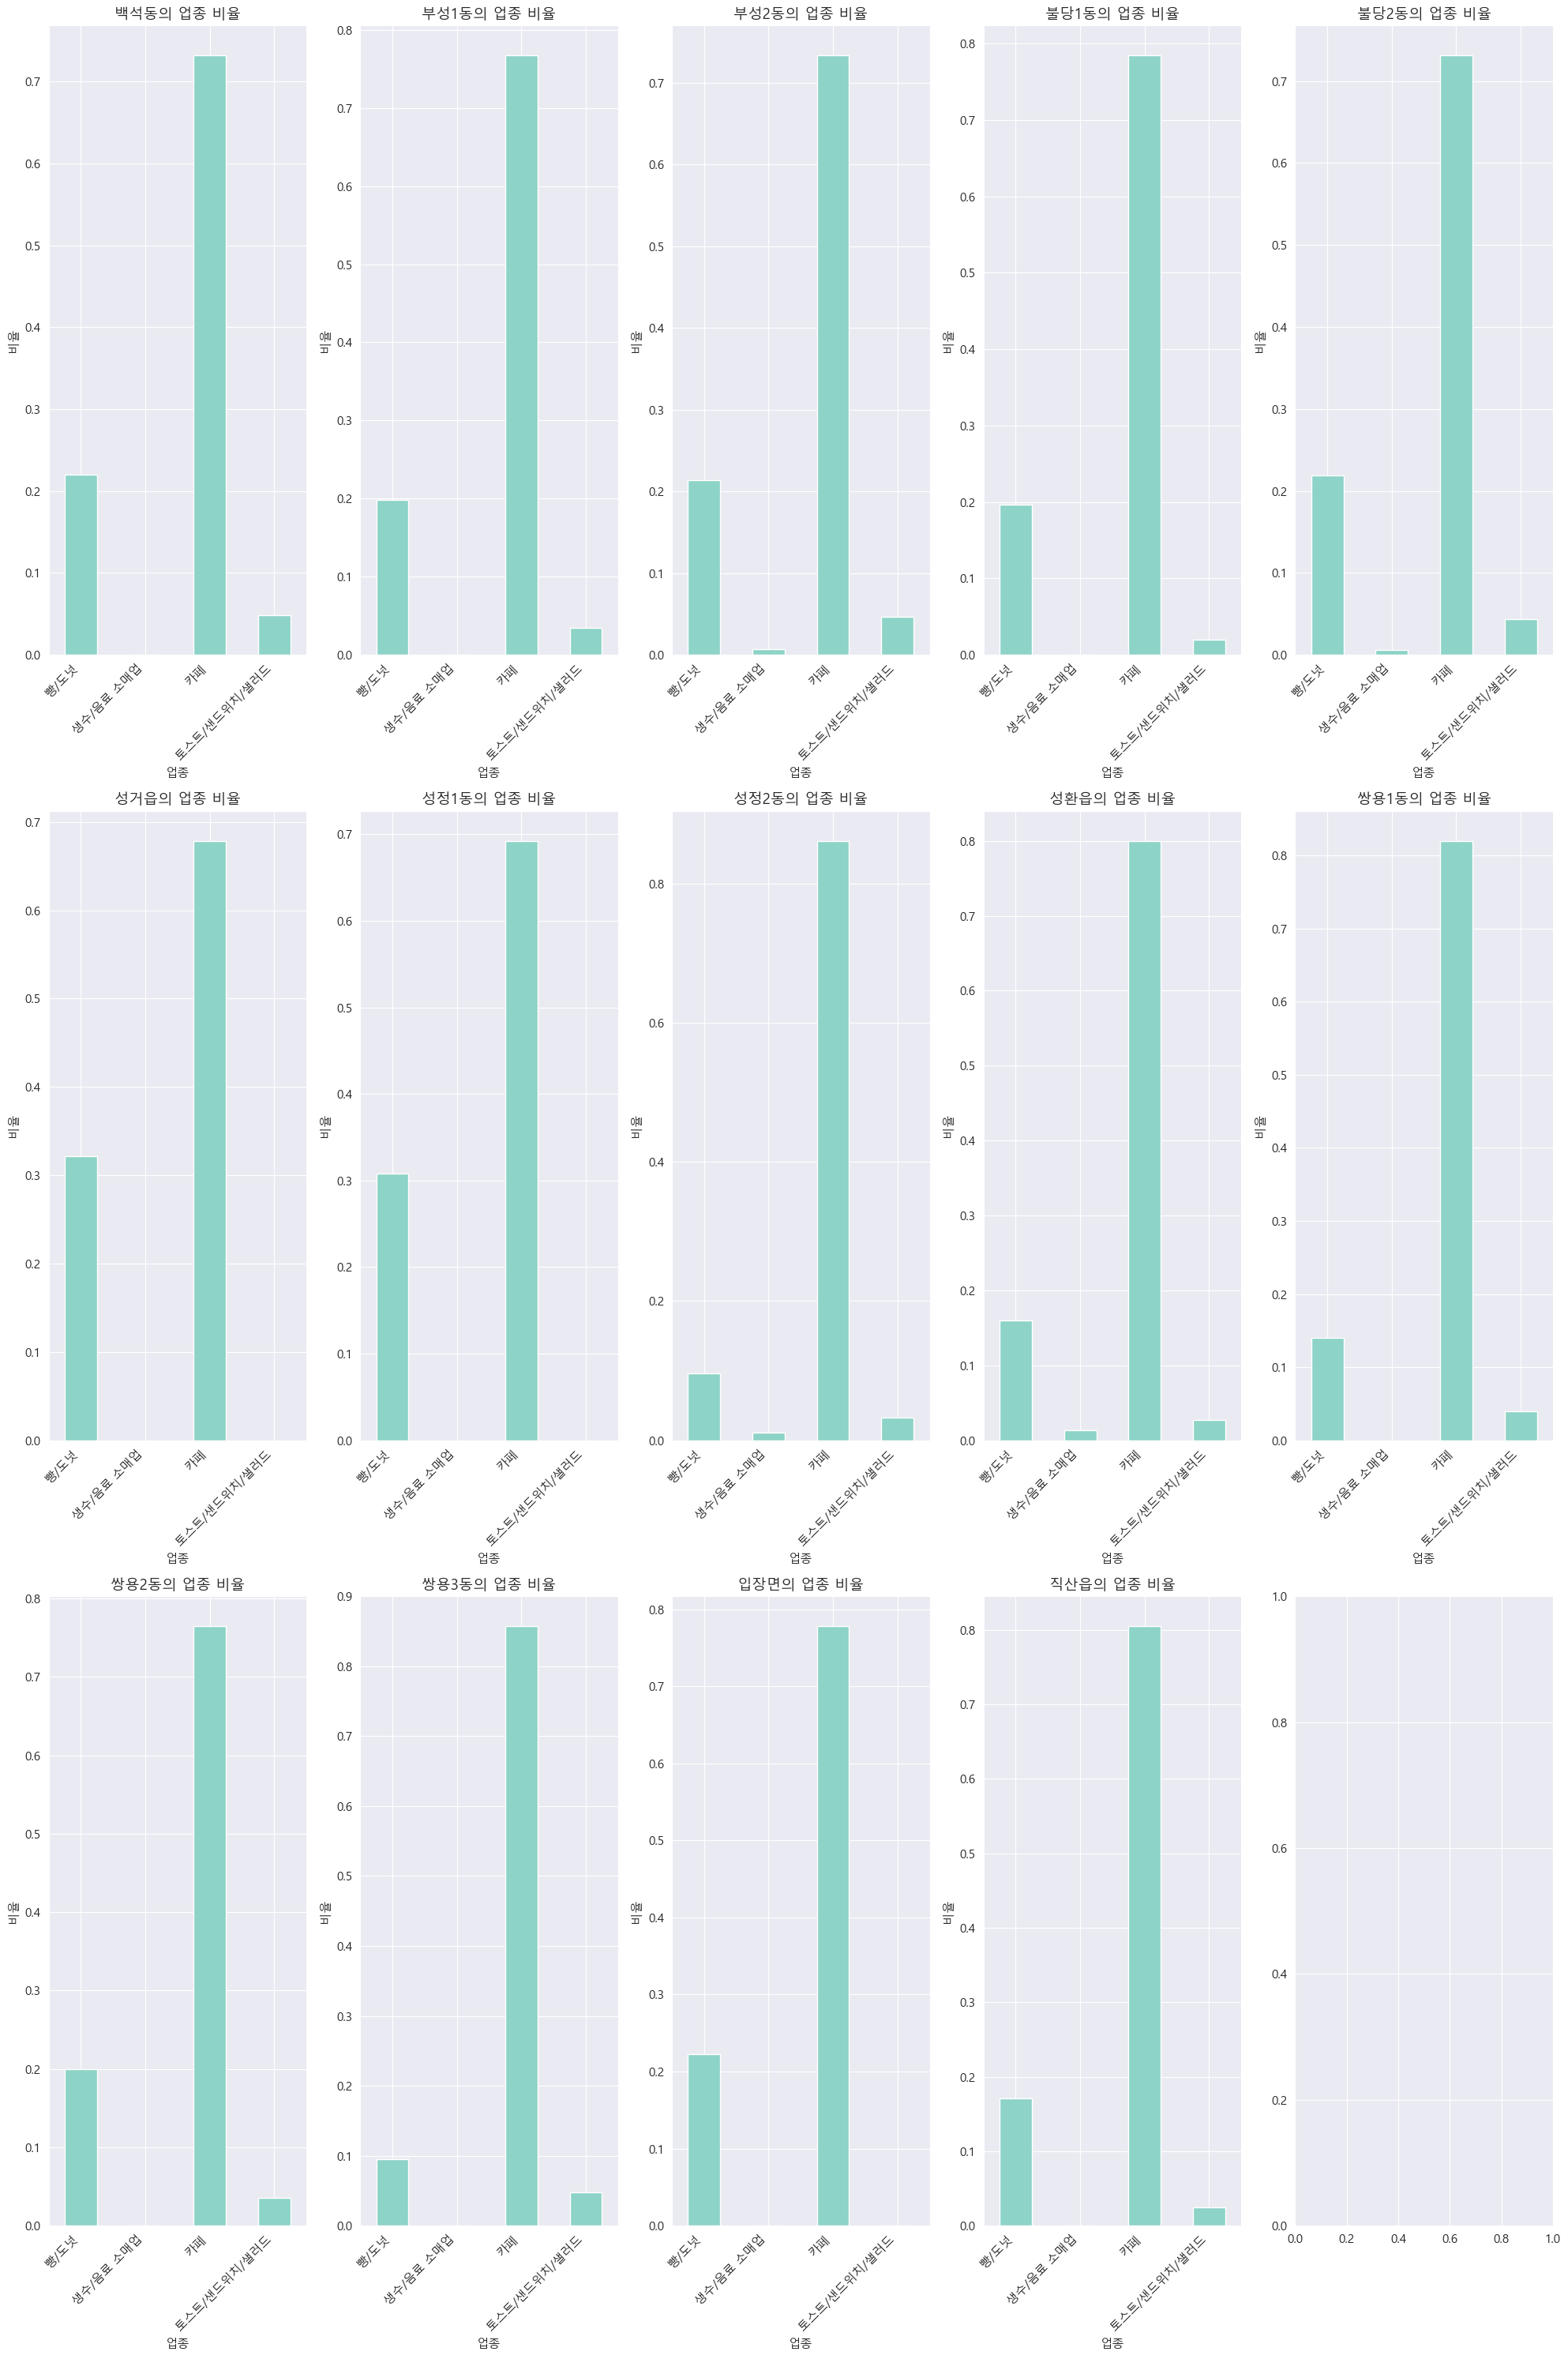

In [143]:
import matplotlib.pyplot as plt

# 분석할 업종들
target_categories = ['카페', '토스트/샌드위치/샐러드', '빵/도넛', '생수/음료 소매업']

# 특정 업종에 해당하는 데이터만 필터링
filtered_data = Cheonan_Seobu0k_Cafe[Cheonan_Seobu0k_Cafe['상권업종소분류명'].isin(target_categories)]

# 행정동별로 업종 비율 계산
grouped = filtered_data.groupby('행정동명')['상권업종소분류명'].value_counts(normalize=True).unstack().fillna(0)

# 행정동별 업종 비율을 막대 그래프로 시각화
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 30))  # 그림의 크기를 크게 조정합니다.
plt.rcParams.update({'font.size': 11})

for i, (index, row) in enumerate(grouped.iterrows()):
    ax = axes[i // 5, i % 5]  # 그리드에 대한 인덱스를 계산합니다.
    row.plot(kind='bar', ax=ax)
    ax.set_title(index + '의 업종 비율')
    ax.set_ylabel('비율')
    ax.set_xlabel('업종')
    ax.set_xticklabels(row.index, rotation=45, ha='right')  # X 축 라벨 회전
plt.tight_layout()
plt.show()


In [144]:
import folium
from folium.plugins import MarkerCluster

map = folium.Map(location=[36.8065, 127.1526], zoom_start = 13)
marker_cluster = MarkerCluster().add_to(map)

# 각 카페 위치에 마커를 추가
for index, row in Cheonan_Seobu0k_Cafe.iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']],  # 위치 설정
        icon=None  # 아이콘 없이 표시
    ).add_to(marker_cluster)

# 지도 출력
map
